In [17]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df=pd.read_csv(r"D:\MY_ML\income.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


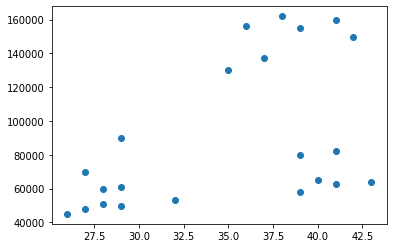

In [19]:
plt.scatter(df['Age'],df['Income'])

In [20]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [22]:
df['Cluster'] = y_predicted        # creating new column in the dataset   ( appending Cluster in table )
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


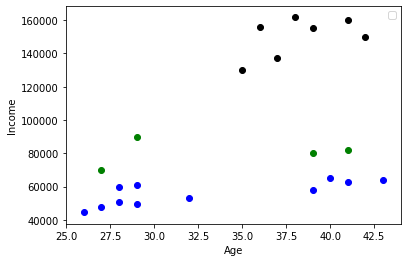

In [23]:
# create 3 different dataframe each belonging to each cluster
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income'],color='green')
plt.scatter(df1.Age,df1['Income'],color='black')
plt.scatter(df2.Age,df2['Income'],color='blue')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

#red is not clustered properly, this happens because our scalling is not correct (y is too high and x is too narrow)

In [27]:
#now we will use MinMaxScalar which will try to make our scaler 0 to 1  

scaler = MinMaxScaler()
scaler.fit(df[['Income']])

#now scaler will scale income features
# transform() function to find the square root and the result of euler's number raised to each element of the dataframe.

df['Income'] = scaler.transform(df[['Income']])
df

,Name,Age,Income,Cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [31]:
#Income range will be in 0
#now we will do same thing for the Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [35]:
#now use KMeans algo to train out dataset
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [41]:
df['Cluster']=y_predicted
df.drop('Cluster',axis='columns',inplace=True)
df

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [43]:
df['Cluster'] = y_predicted        # creating new column in the dataset   ( appending Cluster in table )
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [44]:
df

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


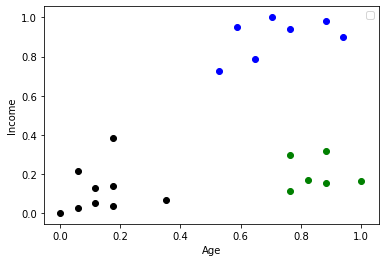

In [45]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income'],color='green')
plt.scatter(df1.Age,df1['Income'],color='black')
plt.scatter(df2.Age,df2['Income'],color='blue')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()


In [46]:
# these centers are basically our centroids 
# help to find star in the graph
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

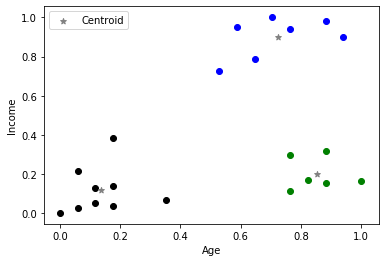

In [48]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income'],color='green')
plt.scatter(df1.Age,df1['Income'],color='black')
plt.scatter(df2.Age,df2['Income'],color='blue')

# 1st point x axis
# [:,] = means i have to go through all rows
# [:,0] = 0 means 1st column
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='grey',marker='*',label='Centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()


In [51]:
#SSE
k_rng=range(1,10)
sse=[]             #SSE k=1,2,3,... will be saved here
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    #what is my SUM OF SQUARE ERROR? How do i get that?
    sse.append(km.inertia_)

In [52]:
sse

[5.434011511987521,
 2.091136388698848,
 0.4750783498551704,
 0.3491047094418983,
 0.27669362763000116,
 0.2187801089333136,
 0.1747358607922878,
 0.14072448985343278,
 0.10188787724978457]

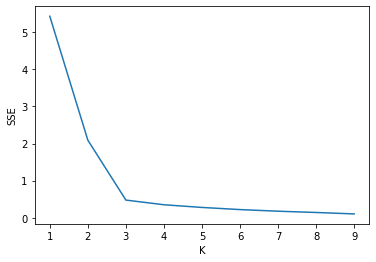

In [53]:
#plot into chart
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)